## Convolutional Neural Networks (CNN)
## TBD Doing better on Fashion MNIST dataset using CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.optimizers import SGD
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_test.shape)
# print(X_test[0])

Using TensorFlow backend.
(60000, 28, 28)
(10000, 28, 28)


In [2]:
# Normalise
# X_train = (X_train / 255) - 0.5
# X_test = (X_test / 255) - 0.5

X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))
# X_test = np.expand_dims(X_test, axis=1)

print(X_train.shape)
print(X_test.shape)
# print(X_test[0])
# plt.imshow(X_train[0])

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
# TBD: Use following architecture to classify fashion MNIST dataset
# activation function is relu for all layers except last where its softmax

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(64, 4, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, 4, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

# 1 Convolutional Layer (filters = 64, kernel_size = 4)
# 2 Convolutional Layer (filters = 64, kernel_size = 4)
# 3 Max Pooling Layer (size 2)
# 4 Convolutional Layer (filters = 128, kernel_size = 3)
# 5 Convolutional Layer (filters = 128, kernel_size = 3)
# 6 Max Pooling Layer (size 2)
# 7 Dense Layer (64 neurons)
# 8 Dense Layer (10 neurons, activation = softmax)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        65600     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 16, 16, 64)        8

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=100, epochs=3, verbose=1, validation_split=0.2)

Epoch 1/3
480/480 [==============================] - 257s 535ms/step - loss: 2.1508 - accuracy: 0.7086 - val_loss: 0.3994 - val_accuracy: 0.8532
Epoch 2/3
480/480 [==============================] - 251s 524ms/step - loss: 0.3657 - accuracy: 0.8683 - val_loss: 0.3271 - val_accuracy: 0.8808
Epoch 3/3
480/480 [==============================] - 259s 539ms/step - loss: 0.3009 - accuracy: 0.8924 - val_loss: 0.2921 - val_accuracy: 0.8924


In [6]:
score = model.evaluate(X_test, Y_test)
print("Test loss:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 11s 35ms/step - loss: 0.3110 - accuracy: 0.8885
Test loss: 0.31095609068870544
Test accuracy: 0.8884999752044678


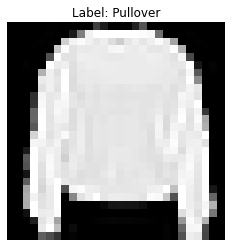

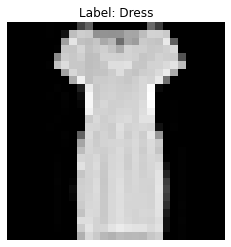

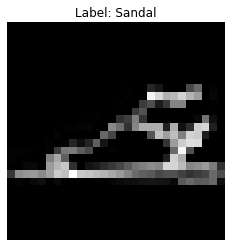

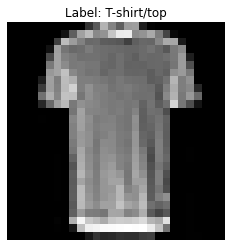

In [15]:
clothes = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}
def predict_sample(n):
    sample = np.reshape(X_train[n], (1, 28, 28, 1))
    predicition = model.predict(sample)
    # print(np.argmax(predicition))
    clothes_label = clothes[np.argmax(predicition)]
    # print(clothes_label)
    plt.axis('off')
    plt.imshow(np.squeeze(sample), cmap='gray')
    plt.title('Label: %s' % clothes_label)
    plt.show()

predict_sample(7)
predict_sample(20)
predict_sample(300)
predict_sample(789)

## Recurrent Neural Networks(RNNs) 
### Sequence Prediction
### Simple RNN

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler

timeseries = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_no_noise.csv')
timeseries.head(15)

,timestamp,value
0,2014-04-01 00:00:00,20.0
1,2014-04-01 00:05:00,20.0
2,2014-04-01 00:10:00,20.0
3,2014-04-01 00:15:00,20.0
4,2014-04-01 00:20:00,20.0
5,2014-04-01 00:25:00,20.0
6,2014-04-01 00:30:00,20.0
7,2014-04-01 00:35:00,20.0
8,2014-04-01 00:40:00,20.0
9,2014-04-01 00:45:00,20.0


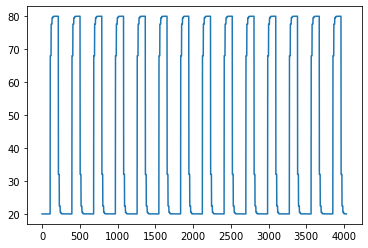

In [105]:
raw_values = timeseries['value'].to_numpy()

plt.plot(raw_values)
plt.show()

In [106]:
print(raw_values.shape)
print(raw_values)

(4032,)
[20.      20.      20.      ... 20.00384 20.00384 20.00384]


In [107]:
scaler = MinMaxScaler()
values = scaler.fit_transform(raw_values[:,np.newaxis])
L = len(values)

In [108]:
timestep_size = 100

def sample(values):
    x = []
    y = []

    L = len(values)
    for i in range(timestep_size, L-1):
        x.append(values[i-timestep_size:i, 0]) # Takes the first 12 samples
        y.append(values[i, 0]) # Predicts the 13th sample

    x = np.array(x)
    y = np.array(y)

    return x, y

# This will exclude the first timestep_size number of samples from predictions from the dataset i.e.

In [109]:
# Example on small list
X_mock, Y_mock = sample(np.arange(102)[:,np.newaxis]) 

print(X_mock.shape)
print(Y_mock.shape)
print("\n======\n")
print(X_mock[0])
print(Y_mock[0])

(1, 100)
(1,)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
100


In [110]:
X_2D, Y = sample(values)
print(X_2D.shape)
print(Y.shape)

(3931, 100)
(3931,)


In [111]:
# [batch_size, timesteps, output_size]
X = X_2D.reshape(X_2D.shape[0], X_2D.shape[1], 1)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [136]:
# TBD: Use a single layer single neuron RNN to make single step prediction for above timeseries 
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

simpleRNN = Sequential()
simpleRNN.add(SimpleRNN(1, input_shape=X[0].shape))
simpleRNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

simpleRNN.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [137]:
simpleRNN.fit(X_train, Y_train, epochs=10, batch_size=25, verbose=1)

Epoch 1/10
3144/3144 [==============================] - 4s 1ms/step - loss: 1.1083 - accuracy: 0.3524
Epoch 2/10
3144/3144 [==============================] - 3s 905us/step - loss: 0.4291 - accuracy: 0.3524
Epoch 3/10
3144/3144 [==============================] - 3s 954us/step - loss: 0.2201 - accuracy: 0.3524
Epoch 4/10
3144/3144 [==============================] - 3s 934us/step - loss: 0.1655 - accuracy: 0.3524
Epoch 5/10
3144/3144 [==============================] - 3s 932us/step - loss: 0.1148 - accuracy: 0.3954
Epoch 6/10
3144/3144 [==============================] - 3s 939us/step - loss: 0.0767 - accuracy: 0.3982
Epoch 7/10
3144/3144 [==============================] - 3s 928us/step - loss: 0.0541 - accuracy: 0.3982
Epoch 8/10
3144/3144 [==============================] - 3s 927us/step - loss: 0.0429 - accuracy: 0.3982
Epoch 9/10
3144/3144 [==============================] - 3s 925us/step - loss: 0.0376 - accuracy: 0.3982
Epoch 10/10
3144/3144 [==============================] - 3s 926us/

In [138]:
simpleRNN.evaluate(X_test, Y_test)

787/787 [==============================] - 1s 971us/step


[0.03086738893348047, 0.4167725443840027]

No handles with labels found to put in legend.


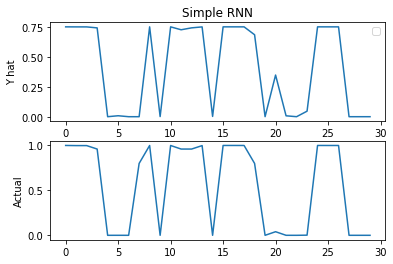

In [149]:
Y_hat = simpleRNN.predict(X_test)

# Simple vs Actual
plt.subplot(2,1,1)
plt.plot(Y_hat[:30])
plt.title('Simple RNN')
plt.ylabel('Y hat')
plt.legend()
plt.subplot(2,1,2)
plt.plot(Y_test[:30])
plt.ylabel('Actual')
plt.show()

## Deep RNN

In [144]:
from keras.layers import LSTM

# TBD: Use following RNN architecture to make single step prediction for given timeseries 
# Layer1 (10 Neurons)
# Layer2 (10 Neurons)
# Layer3 (1 Neurons) Output Layer

deepRNN = Sequential()
deepRNN.add(SimpleRNN(10, return_sequences=True, input_shape=X[0].shape))
deepRNN.add(SimpleRNN(10, return_sequences=True))
deepRNN.add(SimpleRNN(1))
deepRNN.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
deepRNN.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 100, 10)           120       
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 100, 10)           210       
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 1)                 12        
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


In [145]:
deepRNN.fit(X_train, Y_train, epochs=10, batch_size=25, verbose=1)

Epoch 1/10
3144/3144 [==============================] - 12s 4ms/step - loss: 0.2164 - accuracy: 0.3098
Epoch 2/10
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0187 - accuracy: 0.3982
Epoch 3/10
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0150 - accuracy: 0.3982
Epoch 4/10
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0127 - accuracy: 0.3982
Epoch 5/10
3144/3144 [==============================] - 13s 4ms/step - loss: 0.0109 - accuracy: 0.3982
Epoch 6/10
3144/3144 [==============================] - 11s 4ms/step - loss: 0.0094 - accuracy: 0.3982
Epoch 7/10
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0082 - accuracy: 0.3982
Epoch 8/10
3144/3144 [==============================] - 11s 3ms/step - loss: 0.0073 - accuracy: 0.3982
Epoch 9/10
3144/3144 [==============================] - 10s 3ms/step - loss: 0.0067 - accuracy: 0.3982
Epoch 10/10
3144/3144 [==============================] - 10s 3ms/step - l

In [146]:
deepRNN.evaluate(X_test, Y_test)

787/787 [==============================] - 1s 2ms/step


[0.00652118249212923, 0.4167725443840027]

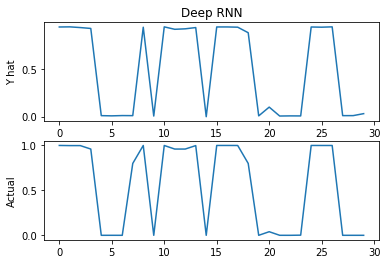

In [152]:
Y_hat_deep = deepRNN.predict(X_test)

# Deep vs Actual
plt.subplot(2,1,1)
plt.plot(Y_hat_deep[:30])
plt.title('Deep RNN')
plt.ylabel('Y hat')
plt.subplot(2,1,2)
plt.plot(Y_test[:30])
plt.ylabel('Actual')
plt.show()

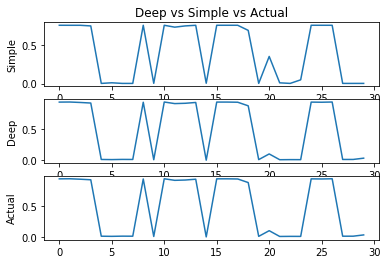

In [155]:
# Deep vs Simple vs Actual
plt.subplot(3,1,1)
plt.plot(Y_hat[:30])
plt.title('Deep vs Simple vs Actual')
plt.ylabel('Simple')
plt.subplot(3,1,2)
plt.plot(Y_hat_deep[:30])
plt.ylabel('Deep')
plt.subplot(3,1,3)
plt.plot(Y_hat_deep[:30])
plt.ylabel('Actual')
plt.show()

## Deep RNN (Multi step prediction)

In [ ]:
# TBD: Use following RNN architecture to make multi step prediction (5) for given timeseries 
# Layer1 (20 Neurons)
# Layer2 (20 Neurons)
# Layer3 (10 Neurons)
# Layer3 (5 Neurons) Output Layer